In [ ]:
#GBM  - fine tuning hyperparameter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore, ks_2samp
import seaborn as sns

%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\מיכאל\Desktop\air bnb germany project\df_level4_feature_selection.csv', encoding='latin1',low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169001 entries, 0 to 169000
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              169001 non-null  int64  
 1   Host Response Time      169001 non-null  float64
 2   Is Superhost            169001 non-null  float64
 3   neighbourhood           169001 non-null  float64
 4   Postal Code             169001 non-null  float64
 5   Is Exact Location       169001 non-null  float64
 6   Property Type           169001 non-null  float64
 7   Accomodates             169001 non-null  float64
 8   Beds                    169001 non-null  float64
 9   Guests Included         169001 non-null  float64
 10  Min Nights              169001 non-null  float64
 11  Reviews                 169001 non-null  float64
 12  Overall Rating          169001 non-null  float64
 13  Cleanliness Rating      169001 non-null  float64
 14  Location Rating     

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import sklearn.metrics as metrics

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regressionMetrics(y_true, y_pred):

    mse = mean_squared_error(y_true, y_pred)
    metrics = {
        'Mean Absolute Error': mean_absolute_error(y_true, y_pred),
        'Mean Squared Error': mse,
        'Root Mean Squared Error': np.sqrt(mse),
        'R^2 Score': r2_score(y_true, y_pred)
    }
    
    # Print the metrics
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")
    
    return metrics

In [9]:
# Extract all columns except 'Price' for feature variables
X = df.loc[:, df.columns != 'Price']

# Extract the 'Price' Target column as the target variable
y = df['Price']

In [10]:
models_list = pd.DataFrame()

In [11]:
#Gradient Boosting Machine (GBM)
mod5 = GradientBoostingRegressor(random_state=1)
mod5.fit(X,y)

pred5 = mod5.predict(X)
model_dict = {'model': "GBM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred5)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

Mean Absolute Error: 176.07
Mean Squared Error: 11485832.46
Root Mean Squared Error: 3389.08
R^2 Score: 0.81


,model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R^2 Score
0,GBM,176.065652,1.148583e+07,3389.075458,0.814098


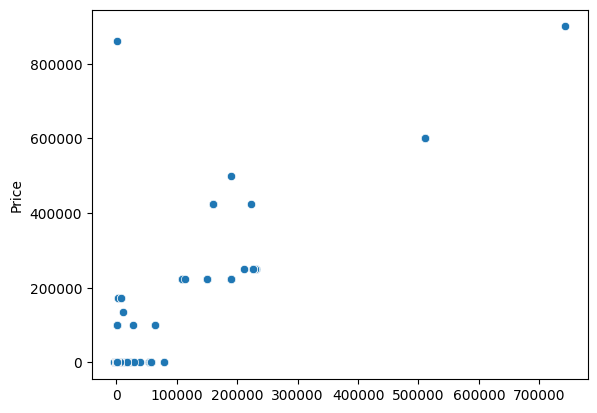

In [12]:
sns.scatterplot(y=y, x=pred5)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define price threshold for splitting data
price_threshold = df['Price'].quantile(0.80)  # 80th percentile

# Split data into low and high price categories
df_low_price = df[df['Price'] <= price_threshold]
df_high_price = df[df['Price'] > price_threshold]

# Extract features and target for low price category
X_low = df_low_price.drop('Price', axis=1)
y_low = df_low_price['Price']

# Extract features and target for high price category
X_high = df_high_price.drop('Price', axis=1)
y_high = df_high_price['Price']

# Split data into training and testing sets for low price category
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low, test_size=0.3, random_state=42)

# Split data into training and testing sets for high price category
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_high, y_high, test_size=0.3, random_state=42)

# Initialize lists to store model results
models_list = pd.DataFrame()

# Train and evaluate Gradient Boosting Model for low price category
mod_low = GradientBoostingRegressor(random_state=1)
mod_low.fit(X_train_low, y_train_low)
pred_low = mod_low.predict(X_test_low)
model_dict_low = {'model': "GBM - Low Price"}
new_row_low = pd.DataFrame([{**model_dict_low, **regressionMetrics(y_test_low, pred_low)}])
models_list = pd.concat([models_list, new_row_low], ignore_index=True)

# Train and evaluate Gradient Boosting Model for high price category
mod_high = GradientBoostingRegressor(random_state=1)
mod_high.fit(X_train_high, y_train_high)
pred_high = mod_high.predict(X_test_high)
model_dict_high = {'model': "GBM - High Price"}
new_row_high = pd.DataFrame([{**model_dict_high, **regressionMetrics(y_test_high, pred_high)}])
models_list = pd.concat([models_list, new_row_high], ignore_index=True)

# Print the results
(models_list)

Mean Absolute Error: 11.24
Mean Squared Error: 198.26
Root Mean Squared Error: 14.08
R^2 Score: 0.42
Mean Absolute Error: 775.41
Mean Squared Error: 116999068.98
Root Mean Squared Error: 10816.61
R^2 Score: 0.61


,model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R^2 Score
0,GBM - Low Price,11.242139,1.982619e+02,14.080551,0.420813
1,GBM - High Price,775.412627,1.169991e+08,10816.610790,0.606920


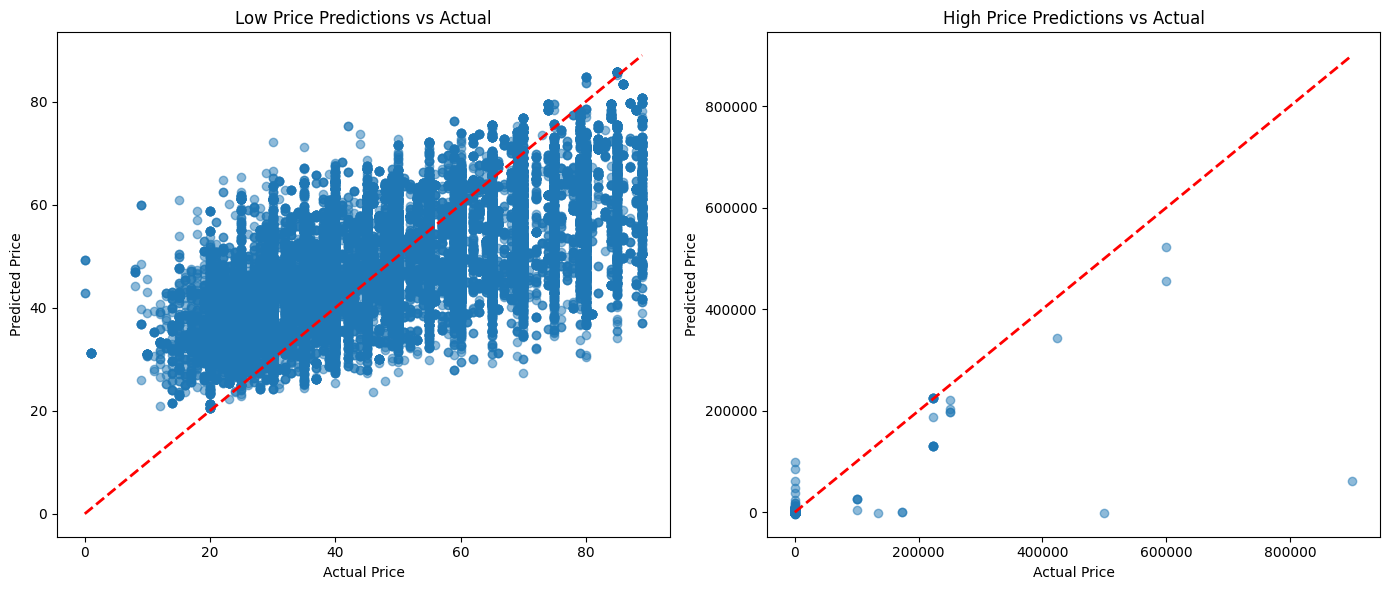

In [15]:
# Plot predictions vs actual prices for low price category
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_low, pred_low, alpha=0.5)
plt.plot([y_test_low.min(), y_test_low.max()], [y_test_low.min(), y_test_low.max()], 'r--', lw=2)
plt.title('Low Price Predictions vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Plot predictions vs actual prices for high price category
plt.subplot(1, 2, 2)
plt.scatter(y_test_high, pred_high, alpha=0.5)
plt.plot([y_test_high.min(), y_test_high.max()], [y_test_high.min(), y_test_high.max()], 'r--', lw=2)
plt.title('High Price Predictions vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Show the plots
plt.tight_layout()
plt.show()